In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from math import tau, pi, sin, cos, exp

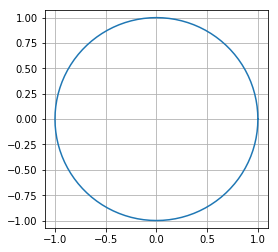

In [3]:
n = 100
theta = np.linspace(0, 2*np.pi, n+1)
r = 1
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.grid()
plt.plot(x, y)

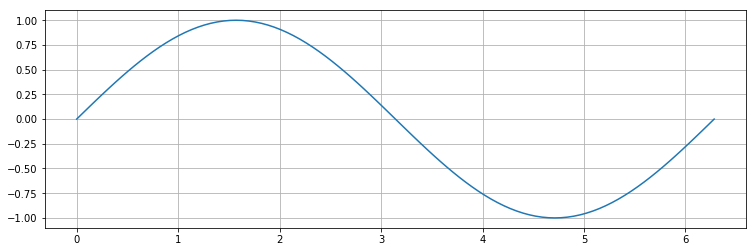

In [4]:
plt.figure(figsize=(4*np.pi, 4))
plt.grid()
plt.plot(theta, y)

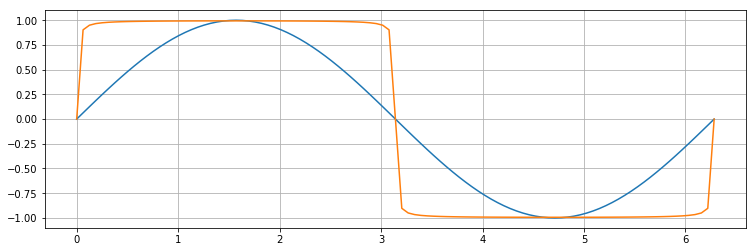

In [105]:
# square wave: Fourier series
theta = np.linspace(0, 2*np.pi, 101)
plt.figure(figsize=(4*np.pi, 4))
plt.grid()
x = np.cos(theta)
y = np.sin(theta)
plt.plot(theta, y)
n = 100
#for n in [10, 50, 500]:
    #sq = 4 / np.pi * sum([np.sin(n*theta) / n for n in range(1, n, 2)])        
    #sq = 4 / np.pi * sum([np.sin((2*k-1)*theta) / (2*k-1) for k in range(1, 101)])
    #plt.plot(theta, sq)
sq = 4 / np.pi * sum([np.sin(n*theta) / n for n in range(1, n, 2)])    
plt.plot(theta, sq)

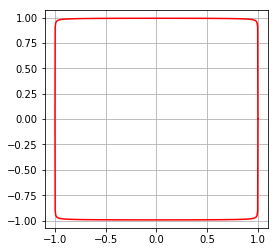

In [102]:
plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.grid()
plt.plot(x, sq, 'r-')

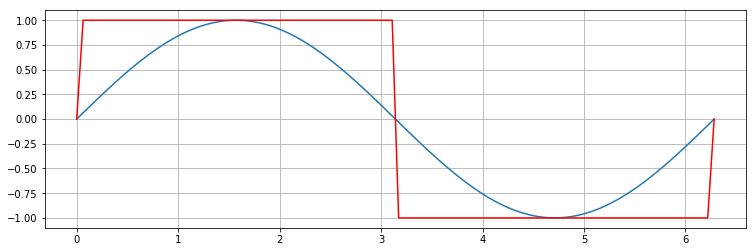

In [6]:
# square wave: another equetion
theta = np.linspace(0, np.pi*2, 100)
y = np.sin(theta)

plt.figure(figsize=(4*np.pi, 4))
plt.grid()
plt.plot(theta, y)

sq = np.sin(theta)
for _ in range(10):
    sq += np.sin(sq)
sq /= np.pi
plt.plot(theta, sq, 'r-')

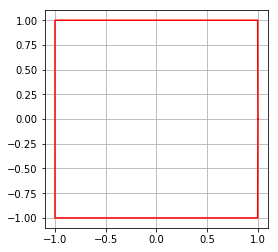

In [374]:
x = r * np.cos(theta)
plt.figure(figsize=(4, 4))
plt.grid()
plt.plot(x, sq, 'r-')

In [393]:
[int(np.sin(n*np.pi/2)) for n in range(1, 10)]

[1, 0, -1, 0, 1, 0, -1, 0, 1]

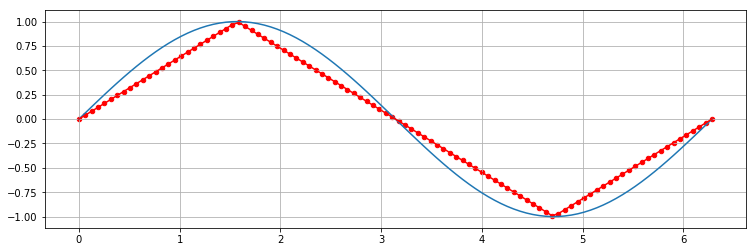

In [12]:
# triangle wave
theta = np.linspace(0, np.pi*2, 100)
plt.figure(figsize=(4*np.pi, 4))
plt.grid()
y = np.sin(theta)
plt.plot(theta, y)

tr = 8 / np.pi**2 * sum([1/k**2 * np.sin(k*np.pi/2) * np.sin(k*theta) for k in range(1, 101)])

plt.plot(theta, tr, 'r-')
plt.scatter(theta, tr, c='r', s=20)

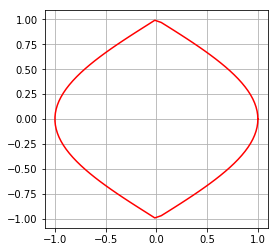

In [348]:
plt.figure(figsize=(4, 4))
plt.grid()
plt.plot(x, tr, 'r-')

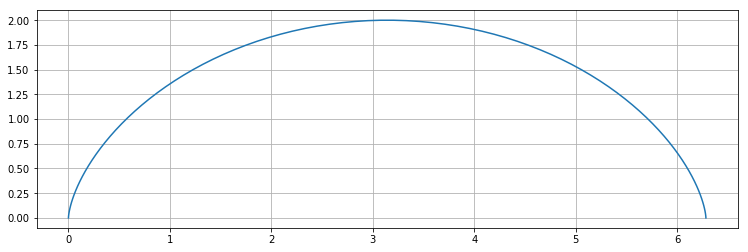

In [437]:
# trochoid
theta = np.linspace(0, np.pi*2, 100)
R = 1
r = 1
x = R*theta - r*np.sin(theta)
y = R - r*np.cos(theta)

plt.figure(figsize=(4*np.pi, 4))
plt.grid()
plt.plot(x, y)

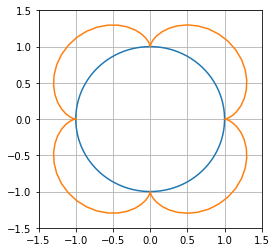

In [451]:
# Epitrochoid
R = 1
r = 1/4
n = 1/4
theta = np.linspace(-np.pi, np.pi, 100)

x = R * np.cos(theta)
y = R * np.sin(theta)

X = (R + r) * np.cos(theta) - n * np.cos((R + r) / r * theta)
Y = (R + r) * np.sin(theta) - n * np.sin((R + r) / r * theta)

plt.figure(figsize=(4, 4))
plt.axis([-1.5, 1.5, -1.5, 1.5], 'equal')
plt.grid()
plt.plot(x, y)
plt.plot(X, Y)

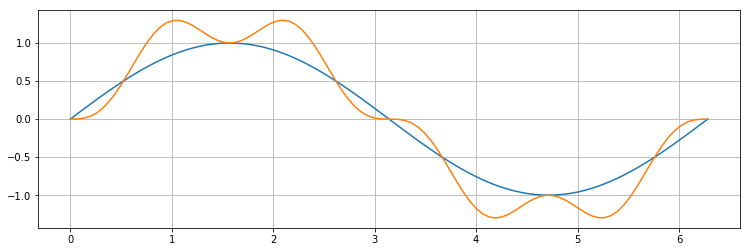

In [350]:
plt.figure(figsize=(4*np.pi, 4))
#plt.axis('equal')
plt.grid()
plt.plot(theta, y)
plt.plot(theta, Y)

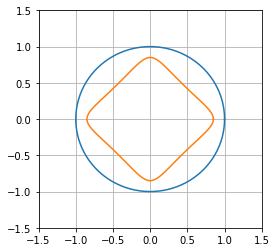

In [453]:
# Hypotrochoid
R = 1
r = 1 / 4
n = 1 / 10
theta = np.linspace(0, np.pi*2, 100)

x = R * np.cos(theta)
y = R * np.sin(theta)

X = (R - r) * np.cos(theta) + n * np.cos((R - r) / r * theta)
Y = (R - r) * np.sin(theta) - n * np.sin((R - r) / r * theta)

plt.figure(figsize=(4, 4))
plt.axis([-1.5, 1.5, -1.5, 1.5], 'equal')
plt.grid()
plt.plot(x, y)
plt.plot(X, Y)

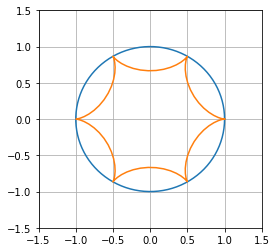

In [914]:
R = 1
r = 1 / 4
theta = np.linspace(0, np.pi*2, 100)

x = R * np.cos(theta)
y = R * np.sin(theta)

X = (R - r) * np.cos(theta) + r * np.cos((R - r) / r * theta)
Y = (R - r) * np.sin(theta) - r * np.sin((R - r) / r * theta)

plt.figure(figsize=(4, 4))
plt.axis([-1.5, 1.5, -1.5, 1.5], 'equal')
plt.grid()
plt.plot(x, y)
plt.plot(X, Y)

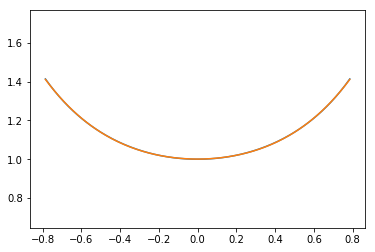

In [2]:
theta = np.linspace(-np.pi/4, np.pi/4, 200)
x = np.ones(200)
r = x / np.cos(theta)
y = r * np.sin(theta)
plt.axis('equal')
plt.plot(theta, r)

res = np.polyfit(theta, r, 4)
#z = sum([res[i]*theta**(len(res)-1-i) for i in range(len(res)) if i % 2 == 0])
#z = res[0]*theta**4 + res[2]*theta**2 + res[4]
#z = 0.31*theta**4 + 0.48*theta**2 + 1
z = np.poly1d(res)(theta)
plt.plot(theta, z)
#print(res[0], res[2], res[4])

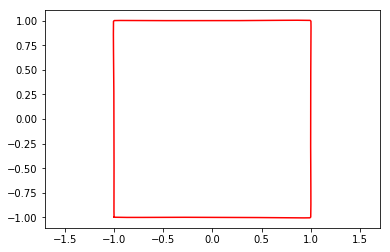

In [6]:
theta = np.linspace(-np.pi+np.pi/4, np.pi+np.pi/4, 200*4)
Z = list(z) * 4
X = Z * np.cos(theta)
Y = Z * np.sin(theta)
plt.axis('equal')
#plt.plot([1, 1, -1, -1, 1], [-1, 1, 1, -1, -1], alpha=1)
plt.plot(X, Y, alpha=1, color='red')

array([-0.7225261 , -0.94668349,  2.67004342])

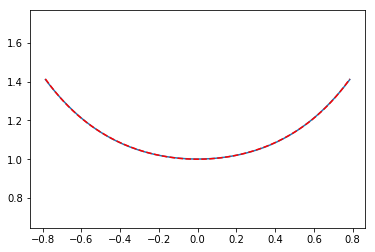

In [26]:
# scipy curve_fif
from scipy.optimize import curve_fit
def f(x, a, b, c):
    return a*np.cos(x**2) + b*np.cos(x) + c

num = 200
theta = np.linspace(-np.pi/4, np.pi/4, num)
x = np.ones(num)
r = x / np.cos(theta)
param, cov = curve_fit(f, theta, r)
y = f(theta, param[0], param[1], param[2])
plt.axis('equal')
plt.plot(theta, y)
plt.plot(theta, r, 'r--')
param

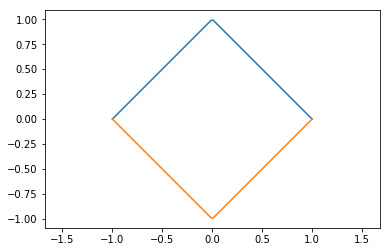

In [11]:
r = 1
x = np.linspace(-r, r, 100)
y = r - abs(x)
plt.axis('equal')
plt.plot(x, y)
plt.plot(x, -y)

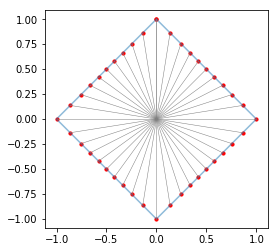

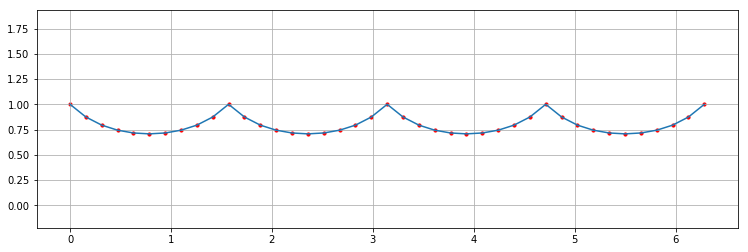

In [860]:
# https://math.stackexchange.com/questions/41940/is-there-an-equation-to-describe-regular-polygons
n = 4
resolution = n * 10
theta = np.linspace(0, np.pi*2, resolution+1)
r = np.cos(np.pi/n) / np.cos((theta % (2*np.pi/n)) - np.pi/n)
x = r * np.sin(theta)
y = r * np.cos(theta)

plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.plot(x, y, alpha=0.5)
plt.scatter(x, y, s=10, c='r')
for i in range(len(theta)):
    plt.plot([0, x[i]], [0, y[i]], c='gray', lw=0.5)
    
plt.figure(figsize=(4*np.pi, 4))
plt.grid()
plt.axis('equal')
plt.plot(theta, r)
plt.scatter(theta, r, s=10, c='r')

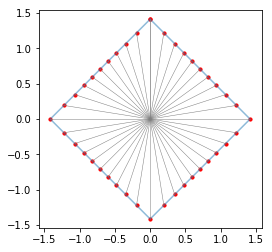

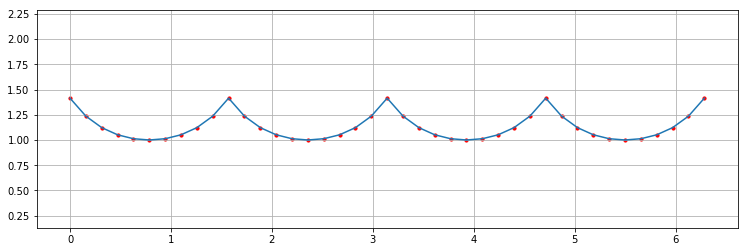

In [887]:
# Simple
n = 4
resolution = n * 10
theta = np.linspace(0, np.pi*2, resolution+1)

r = 1 / np.cos(theta % (2*np.pi/n) - np.pi/n)
x = r * np.sin(theta)
y = r * np.cos(theta)

plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.plot(x, y, alpha=0.5)
plt.scatter(x, y, s=10, c='r')
for i in range(len(theta)):
    plt.plot([0, x[i]], [0, y[i]], c='gray', lw=0.5)
    
plt.figure(figsize=(4*np.pi, 4))
plt.grid()
plt.axis('equal')
plt.plot(theta, r)
plt.scatter(theta, r, s=10, c='r')

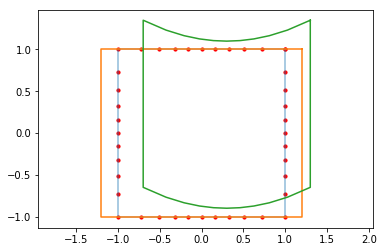

In [897]:
# Simple tilt
n = 4
resolution = n * 10
theta = np.linspace(0, np.pi*2, resolution+1)

r = 1 / np.cos(theta % (2*np.pi/n) - np.pi/n)
theta += np.pi/n # tilt at 45 degrees
x = r * np.sin(theta)
y = r * np.cos(theta)

#plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.plot(x, y, alpha=0.5)
plt.scatter(x, y, s=10, c='r')

plt.plot(x*1.2, y) # yellow line

y1 = 1/4 * x**2
plt.plot(x+0.3, y+y1+0.1) # green line
# for i in range(len(theta)):
#     plt.plot([0, x[i]], [0, y[i]], c='gray', lw=0.5)
    
# plt.figure(figsize=(4*np.pi, 4))
# plt.grid()
# plt.axis('equal')
# plt.plot(theta, r)

In [178]:
F = 10
#C = [int(np.cos(np.pi/2 * i)) * (i+1) for i in range(F)]
C = [int(np.cos(np.pi/2 * (2*i+1)))  for i in range(F)]
C

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [199]:
n = 3
[(k*n+(-1)**k)*(-1)**k for k in range(10)]

[1, -2, 7, -8, 13, -14, 19, -20, 25, -26]

In [183]:
C = [..., -8, -5, -2, 1, 4, 7, 10, ...]
[1, -2, 4, -5, 7, -8, 10] 1, kn-1, kn+1
C = [..., -11, -7, -3, 1, 5, 9, 13, ...]
[1, -3, 5, -7, 9, -11, 13]
C = [..., -11, -7, -3, 1, 6, 11, 14, ...]

17

0.09374356752236701

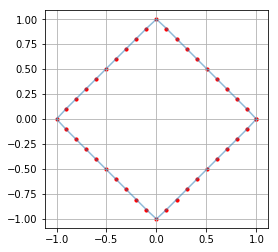

In [324]:
# Epicycles polygon
n = 4
resolution = n * 10
theta = np.linspace(0, 2*np.pi, resolution+1)
F = 30
C = [1 + f*n for f in range(-F//2, F//2)]
R = sum([1/c**2 * np.exp(c*1j*theta) for c in C]) / sum([1/c**2 for c in C])
#R = sum([1/c**2 * np.exp(c*1j*theta) for c in C])
x = R.real
y = R.imag

plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5, )
plt.scatter(x, y, s=10, c='r')
#plt.scatter(x[0], y[0], s=10, c='k')
x[0]-x[1]

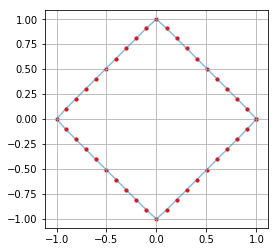

In [341]:
# Epicycles polygon two
n = 4
div = n * 10
theta = np.linspace(0, 2*np.pi, div+1) #theta = np.arange(0, 2*np.pi, np.pi/div)
F = 20
V = sum([1 / (1 + f * n)**2 * np.exp((1 + f * n) * 1j * theta) for f in range(-F // 2, F // 2)])
V /= sum([1 / (1 + f * n)**2 for f in range(-F // 2, F // 2)])

x = V.real
y = V.imag

plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5, )
plt.scatter(x, y, s=10, c='r')
#plt.scatter(x[0], y[0], s=10, c='k')

41


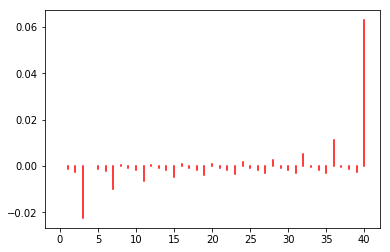

In [342]:
# DFT
def dft(f):
    N = len(f)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += f[t] * np.exp(-2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y)

def idft(F):
    N = len(F)
    Y = []
    for x in range(N):
        y = 0
        for t in range(N):
            y += F[t] * np.exp(2j * np.pi * t * x / N)
        Y.append(y)
    return np.array(Y) / N
    
F = idft(V)
print(len(F))
for i in range(len(F)):
    plt.plot([i, i], [0, F[i].imag], c='red')


In [336]:
f = np.fft.fft(R)
F = np.fft.ifft(f)

#F = np.fft.ifft(R)
#f = np.fft.fft(F)
# for i in range(len(F)):
#     plt.plot([i, i], [0, f[i].imag], c='red')

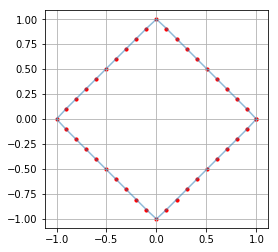

In [337]:
#F = idft(F)
x = F.real
y = F.imag

plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5, )
plt.scatter(x, y, s=10, c='r')
#plt.scatter(x[0], y[0], s=10, c='k')

In [6]:
def intersection(x1,y1,x2,y2,x3,y3,x4,y4):
    A = (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4)
    B = (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4)
    if A != 0 and B!= 0:
        px= ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / A
        py= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / B
        return [px, py]
    else:
        print('No Intersection')
        #return [0, 0]
        

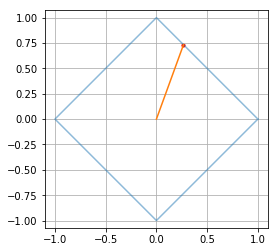

In [18]:
# intersection
def intersection(x1,y1,x2,y2,x3,y3,x4,y4):
    A = (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4)
    B = (x1-x2)*(y3-y4)-(y1-y2)*(x3-x4)
    if A != 0 and B!= 0:
        px= ( (x1*y2-y1*x2)*(x3-x4)-(x1-x2)*(x3*y4-y3*x4) ) / A
        py= ( (x1*y2-y1*x2)*(y3-y4)-(y1-y2)*(x3*y4-y3*x4) ) / B
        return [px, py]

N = 4
theta = np.linspace(0, 2*np.pi, N+1)
R = np.exp(1j * theta)
x = R.real
y = R.imag

deg = np.deg2rad(70)
n = int(deg * N / (2*np.pi)) % N
px, py = intersection(0, 0, np.cos(deg), np.sin(deg), R[n].real, R[n].imag, R[n+1].real, R[n+1].imag)
        
plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5)
plt.plot([0, px], [0, py])
plt.scatter(px, py, s=10, c='r')
#plt.scatter(x, y, s=20, c='k')

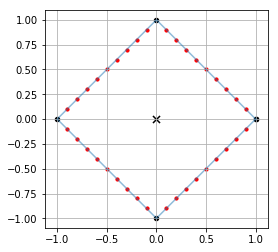

In [24]:
# polygon divided into segments
N = 4
theta = np.linspace(0, 2*np.pi, N+1)
V = np.exp(1j * theta) # R = np.cos(theta) + 1j*np.sin(theta)
Div = 10
P = np.array([(V[k+1] - V[k])*d/Div + V[k] for d in range(Div) for k in range(N)])

x = V.real
y = V.imag
vx = P.real
vy = P.imag

plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5)
plt.scatter(vx, vy, s=10, c='r')
plt.scatter(x, y, s=20, c='k')
plt.scatter(0, 0, s=50, c='k', marker='x')

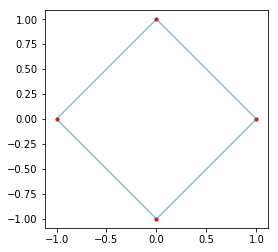

In [18]:
# complex numbers exp(i*t) = cos(t) + i*sin(t)
n = 4
#p = np.array([(np.cos(2*np.pi/n) + 1j*np.sin(2*np.pi/n))**k for k in range(n)])
p = np.array([(np.exp(2*np.pi*1j/n))**k for k in range(n)])
x = p.real
y = p.imag
plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.plot(np.append(x, x[0]), np.append(y, y[0]), alpha=0.5)
plt.scatter(x, y, s=10, c='r')

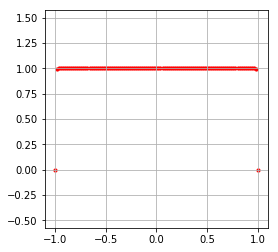

In [595]:
n = 100
r = 1
x = np.linspace(-r, r, 101)
y = (r**n - x**n)**(1/n)

plt.figure(figsize=(4,4))
plt.axis('equal')
plt.grid()
#plt.plot(x, y, alpha=1, color='red')
plt.scatter(x, y, s=10, c='r')

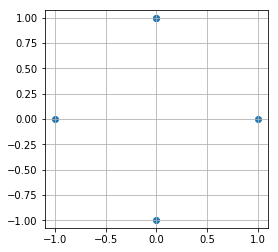

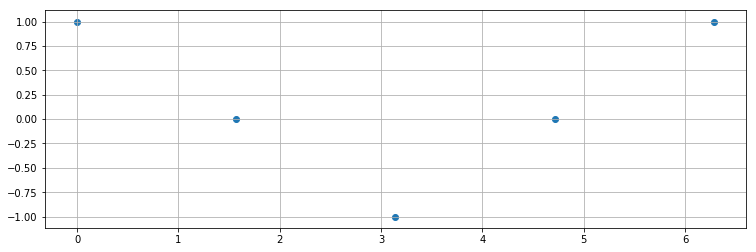

In [520]:
n = 4
theta = np.linspace(0, 2*pi, n+1)
r = 1
x = r * np.sin(theta)
y = r * np.cos(theta)

plt.figure(figsize=(4, 4))
plt.axis('equal')
plt.grid()
plt.scatter(x, y)

plt.figure(figsize=(4*pi, 4))
plt.grid()
plt.scatter(theta, y)

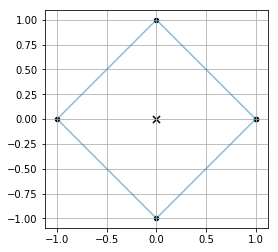

In [147]:
N = 4
t = np.linspace(0, 2*np.pi, N+1)
P = np.exp(1j * t)
x = P.real
y = P.imag

plt.figure(figsize=(4, 4))
plt.grid()
plt.axis('equal')
plt.plot(x, y, alpha=0.5)
#plt.scatter(vx, vy, s=10, c='r')
plt.scatter(x, y, s=20, c='k')
plt.scatter(0, 0, s=50, c='k', marker='x')